# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import zipfile


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Unzip train and test directory

In [2]:
os.listdir('/kaggle/input/dogs-vs-cats/')

['test1.zip', 'train.zip', 'sampleSubmission.csv']

In [3]:
mkdir train

In [4]:
!unzip -q /kaggle/input/dogs-vs-cats/train.zip -d train/

In [5]:
os.listdir('/kaggle/working/train/')

['train']

In [6]:
mkdir test

In [7]:
!unzip -q /kaggle/input/dogs-vs-cats/test1.zip -d test/

In [8]:
os.listdir('/kaggle/working/test/')

['test1']

**if want to remove train directory**
* rm -r /kaggle/working/train/

**If we want to read images without create directory by the following way**

In [9]:
#------------------for train.zip directory---------------------- 
# import zipfile
# from PIL import Image
# import io
# import numpy as np

# # Load the train.zip file
# with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as zip_ref:
#     # Get a list of all the file names in the zip file
#     file_names = zip_ref.namelist()
#     # Initialize an empty list to store the image data
#     train_imgs = []
#     # Loop over each file in the zip file
#     for file_name in file_names:
#         # Check if the file is an image file
#         if file_name.endswith('.jpg'):
#             # Open the image file inside the zip
#             with zip_ref.open(file_name) as file:
#                 # Read the contents of the file into memory
#                 img_data = io.BytesIO(file.read())
#                 # Load the image data into a PIL Image object
#                 img = Image.open(img_data)
#                 # Append the image data to the list
#                 train_imgs.append(np.array(img))
# len(train_imgs)

In [10]:
#------------------for test.zip directory---------------------- 
# with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as zip_ref:
#     test_imgs = []
#     for file_name in zip_ref.namelist():
#         if file_name.endswith('.jpg'):
#             with zip_ref.open(file_name) as file:
#                 img_data = io.BytesIO(file.read())
#                 img = Image.open(img_data)
#                 test_imgs.append(np.array(img))
#len(train_imgs)

# Overview on the data

**we have 2500 train image**

In [11]:
filenames = os.listdir("../working/train/train")
len(filenames)

25000

**we have 12500 test image**

In [12]:
testfilenames = os.listdir("../working/test/test1")
len(testfilenames)

12500

In [13]:
filenames[:10]

['cat.2785.jpg',
 'dog.12117.jpg',
 'cat.9215.jpg',
 'cat.235.jpg',
 'dog.11047.jpg',
 'cat.7071.jpg',
 'dog.3134.jpg',
 'dog.9206.jpg',
 'dog.2925.jpg',
 'cat.11777.jpg']

In [14]:
categories=[]
for img in filenames:
    category = img.split('.')[0]
    if category == 'cat':
        categories.append(0)
    elif category == 'dog':
        categories.append(1)

In [15]:
df = pd.DataFrame({'filename':filenames,'category':categories})

In [16]:
df.head()

filename  category
0   cat.2785.jpg         0
1  dog.12117.jpg         1
2   cat.9215.jpg         0
3    cat.235.jpg         0
4  dog.11047.jpg         1

In [17]:
df.tail()

filename  category
24995  dog.9854.jpg         1
24996  dog.9226.jpg         1
24997  dog.2358.jpg         1
24998   dog.239.jpg         1
24999  cat.8994.jpg         0

<AxesSubplot: >

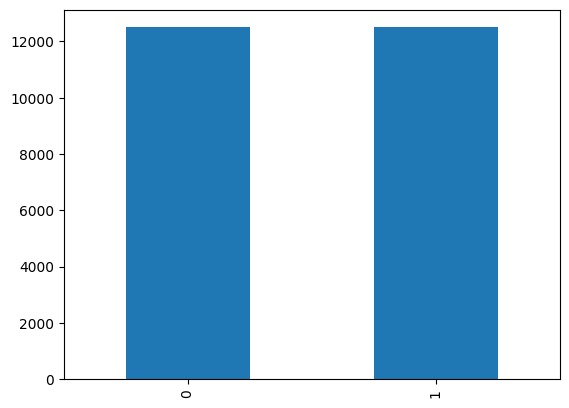

In [18]:
df['category'].value_counts().plot.bar()

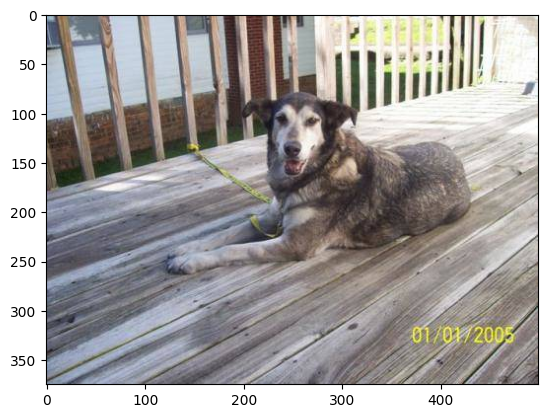

In [19]:
sample = random.choice(filenames)
image = load_img("/kaggle/working/train/train/"+sample)
plt.imshow(image)


In [20]:
size=[]
for file in filenames:
    img = load_img("/kaggle/working/train/train/"+file)
    np_img = np.array(img)
    size.append(np_img.shape)
pd.Series(size).value_counts()

(374, 500, 3)    2955
(375, 499, 3)    2912
(499, 375, 3)     261
(333, 499, 3)     229
(500, 374, 3)     227
                 ... 
(239, 500, 3)       1
(362, 385, 3)       1
(198, 215, 3)       1
(337, 337, 3)       1
(269, 353, 3)       1
Length: 8513, dtype: int64

In [21]:
img = np.array(image)
img.shape

(375, 499, 3)

### set shape of images

In [22]:
IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS = 128,128,3
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
FAST_RUN = False

# Build Model

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

# Callbacks

In [24]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

### Early Stop
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [25]:
earlystop = EarlyStopping(patience=10)

### Learning Rate Reduction
We will reduce the learning rate when then accuracy not increase for 2 steps

In [26]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [27]:
callbacks = [earlystop, learning_rate_reduction]

# Prepare Data (Preprocessing)

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to dog and 0 to cat

In [28]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [29]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [30]:
train_df.index

RangeIndex(start=0, stop=20000, step=1)

<AxesSubplot: >

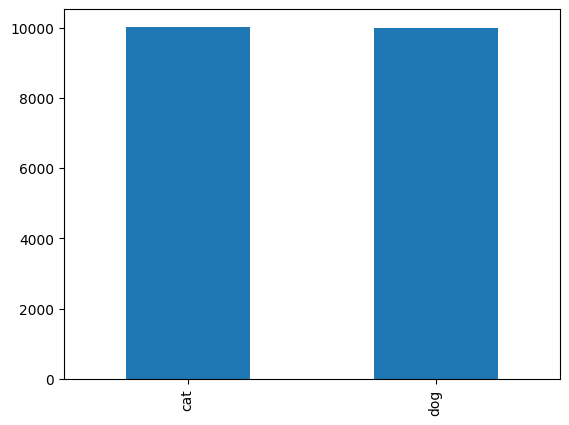

In [31]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot: >

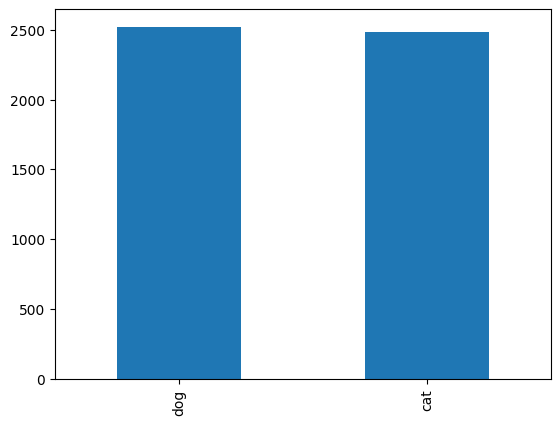

In [32]:
validate_df['category'].value_counts().plot.bar()

In [33]:
len(validate_df)

5000

In [34]:
len(train_df)

20000

In [35]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Data Augmentation

### Traning Generator

In [36]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator = train_datagen.flow_from_dataframe(
train_df,
"/kaggle/working/train/train",
x_col="filename",
y_col="category",
target_size=IMAGE_SIZE,
class_mode="categorical",
batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


### Validation Generator

In [37]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/kaggle/working/train/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


**See how our generator work**

In [38]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/kaggle/working/train/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


In [39]:
example_generator

In [40]:
# Print the batch size of the generator
print('Batch size:', example_generator.batch_size)

Batch size: 32


In [41]:
# Retrieve the next batch of samples and labels from the generator
x_example, y_example = next(example_generator)

# Print the shape of the input samples and labels
print('Input samples shape:', x_example.shape)
print('Input labels shape:', y_example.shape) 

Input samples shape: (1, 128, 128, 3)
Input labels shape: (1, 1)


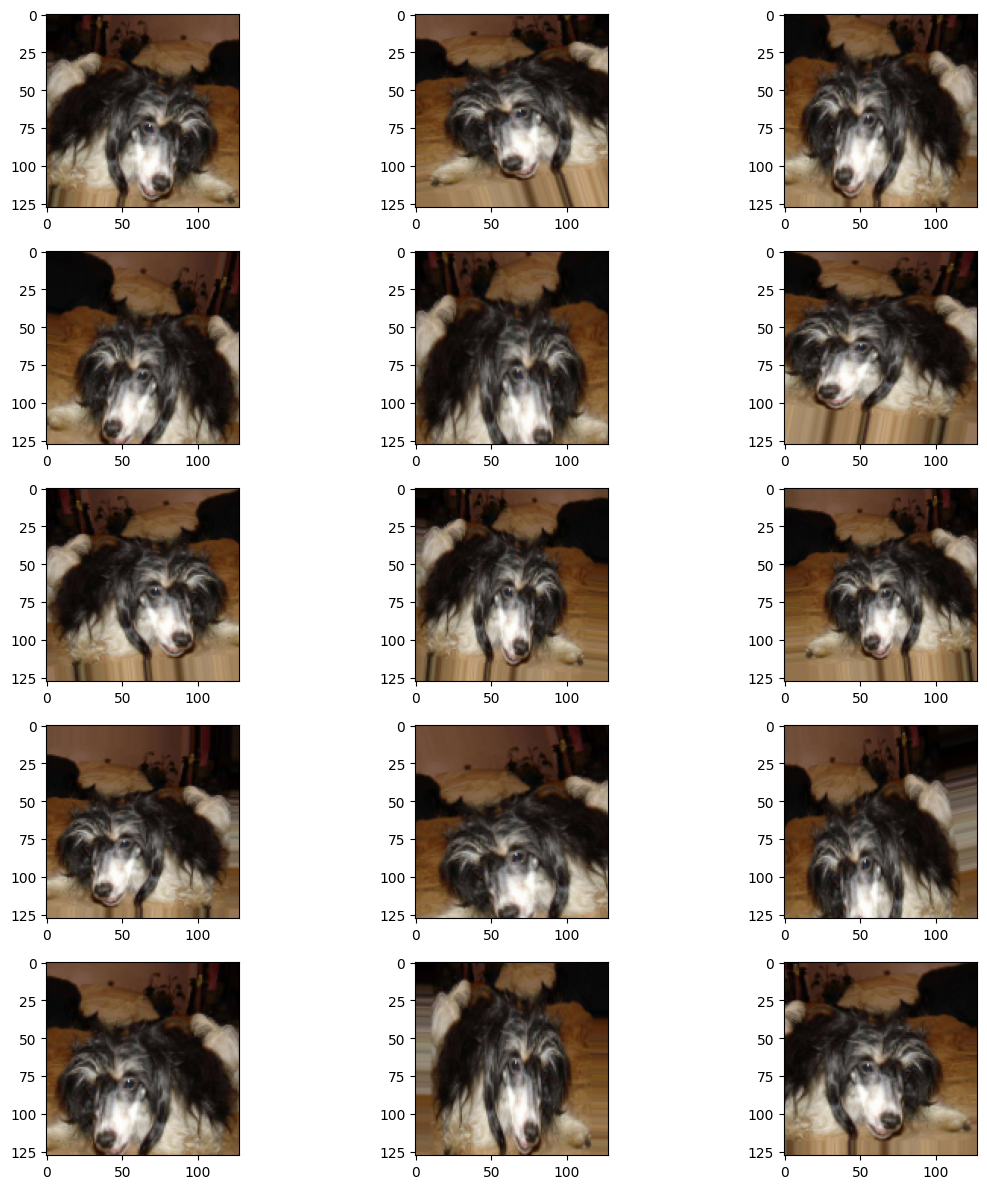

In [42]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for x_batch, y_batch in example_generator:
        image = x_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fit Model

In [43]:
epochs=5 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

/tmp/ipykernel_23/784913941.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50


2023-05-27 12:19:56.231367: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1333/1333 [==============================] - 137s 92ms/step - loss: 0.7497 - accuracy: 0.6314 - val_loss: 0.5991 - val_accuracy: 0.6753 - lr: 0.0010
Epoch 2/50
1333/1333 [==============================] - 119s 89ms/step - loss: 0.5637 - accuracy: 0.7151 - val_loss: 0.5711 - val_accuracy: 0.7315 - lr: 0.0010
Epoch 3/50
1333/1333 [==============================] - 122s 92ms/step - loss: 0.5066 - accuracy: 0.7601 - val_loss: 0.4920 - val_accuracy: 0.7806 - lr: 0.0010
Epoch 4/50
1333/1333 [==============================] - 121s 91ms/step - loss: 0.4659 - accuracy: 0.7847 - val_loss: 0.7612 - val_accuracy: 0.6657 - lr: 0.0010
Epoch 5/50
1333/1333 [==============================] - 120s 90ms/step - loss: 0.4411 - accuracy: 0.7958 - val_loss: 0.5125 - val_accuracy: 0.7886 - lr: 0.0010
Epoch 6/50
1333/1333 [==============================] - 123s 93ms/step - loss: 0.4192 - accuracy: 0.8102 - val_loss: 0.3506 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 7/50
1333/1333 [=============================

# Save Model


In [44]:
model.save_weights("model.h5")

# Virtualize Mode Performance on Training 

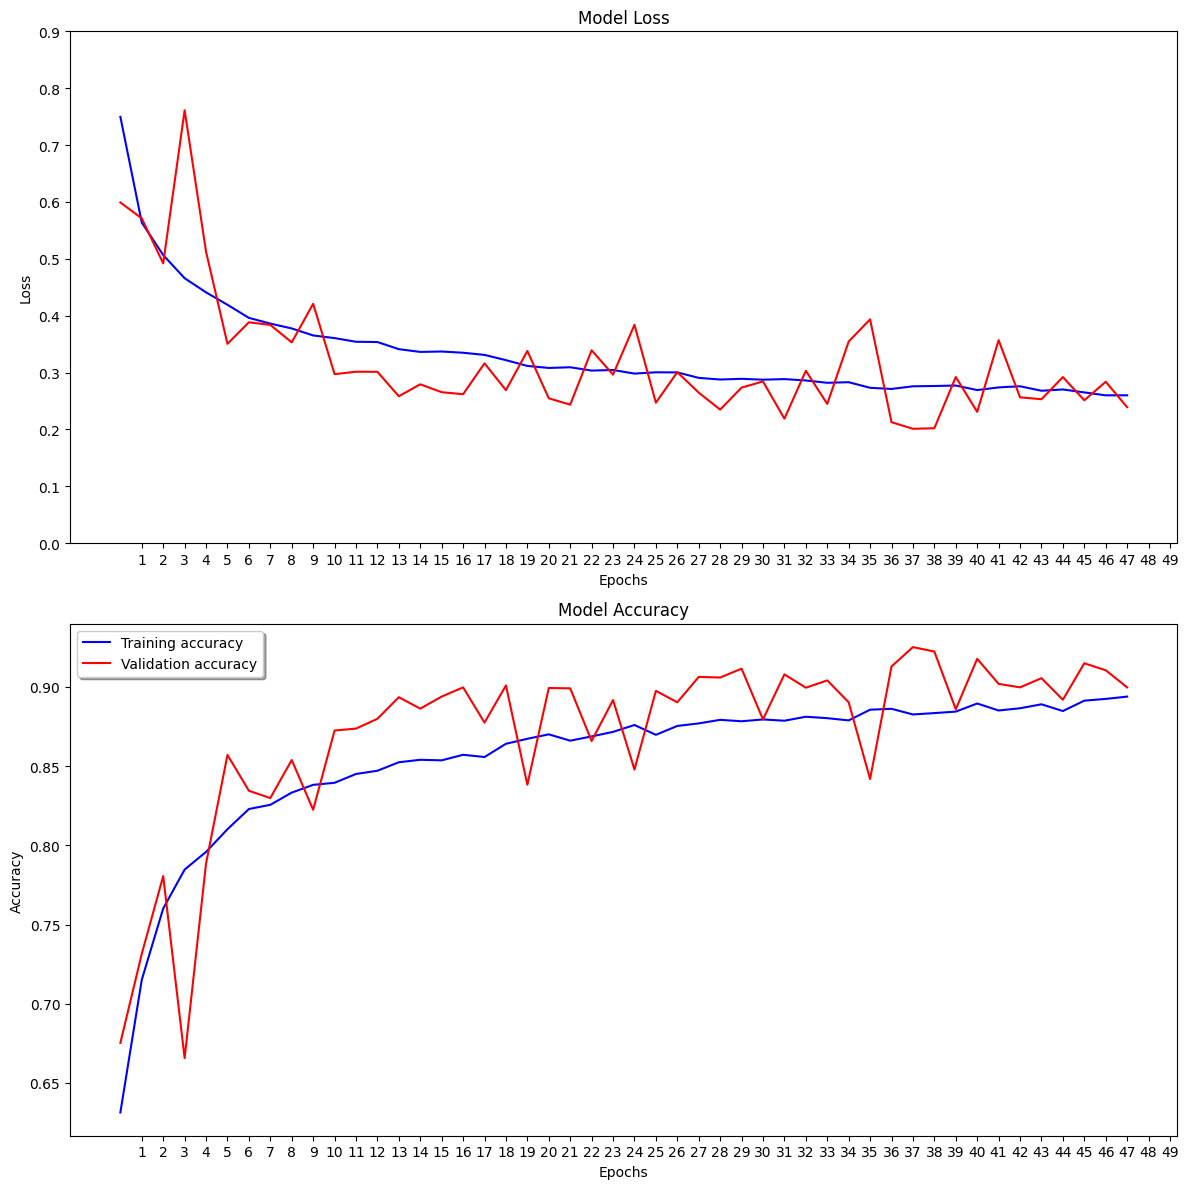

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_xlabel("Epochs")
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_ylabel("Loss")
ax1.set_title("Model Loss")

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_title("Model Accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data


In [46]:
test_df = pd.DataFrame({
    'filename': testfilenames
})
nb_samples = test_df.shape[0]

In [47]:
test_df.head()

filename
0  2232.jpg
1   941.jpg
2   259.jpg
3  2191.jpg
4   999.jpg

### Testing Generator

In [48]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../working/test/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


# Predict

In [49]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

/tmp/ipykernel_23/3090721588.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [50]:
predict

array([[7.3387116e-02, 9.2661291e-01],
       [3.0922011e-01, 6.9077992e-01],
       [9.9448782e-01, 5.5121589e-03],
       ...,
       [9.9978107e-01, 2.1899643e-04],
       [7.2247136e-01, 2.7752861e-01],
       [5.3595680e-01, 4.6404317e-01]], dtype=float32)

In [51]:
test_df['category'] = np.argmax(predict, axis=-1)

In [52]:
test_df.head()

filename  category
0  2232.jpg         1
1   941.jpg         1
2   259.jpg         0
3  2191.jpg         0
4   999.jpg         0

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [53]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'cat', 1: 'dog'}

In [54]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [55]:
test_df.head()

filename category
0  2232.jpg      dog
1   941.jpg      dog
2   259.jpg      cat
3  2191.jpg      cat
4   999.jpg      cat

From our prepare data part. We map data with `{0: 'cat', 1: 'dog'}`. Now we will map the result back to dog is 1 and cat is 0



In [56]:
test_df['category'] = test_df['category'].replace({ 'cat': 0, 'dog': 1 })

### Virtaulize Result

<AxesSubplot: >

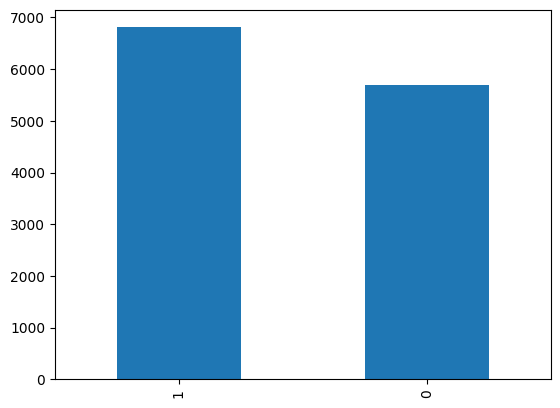

In [57]:
test_df['category'].value_counts().plot.bar()

# See predicted result with images

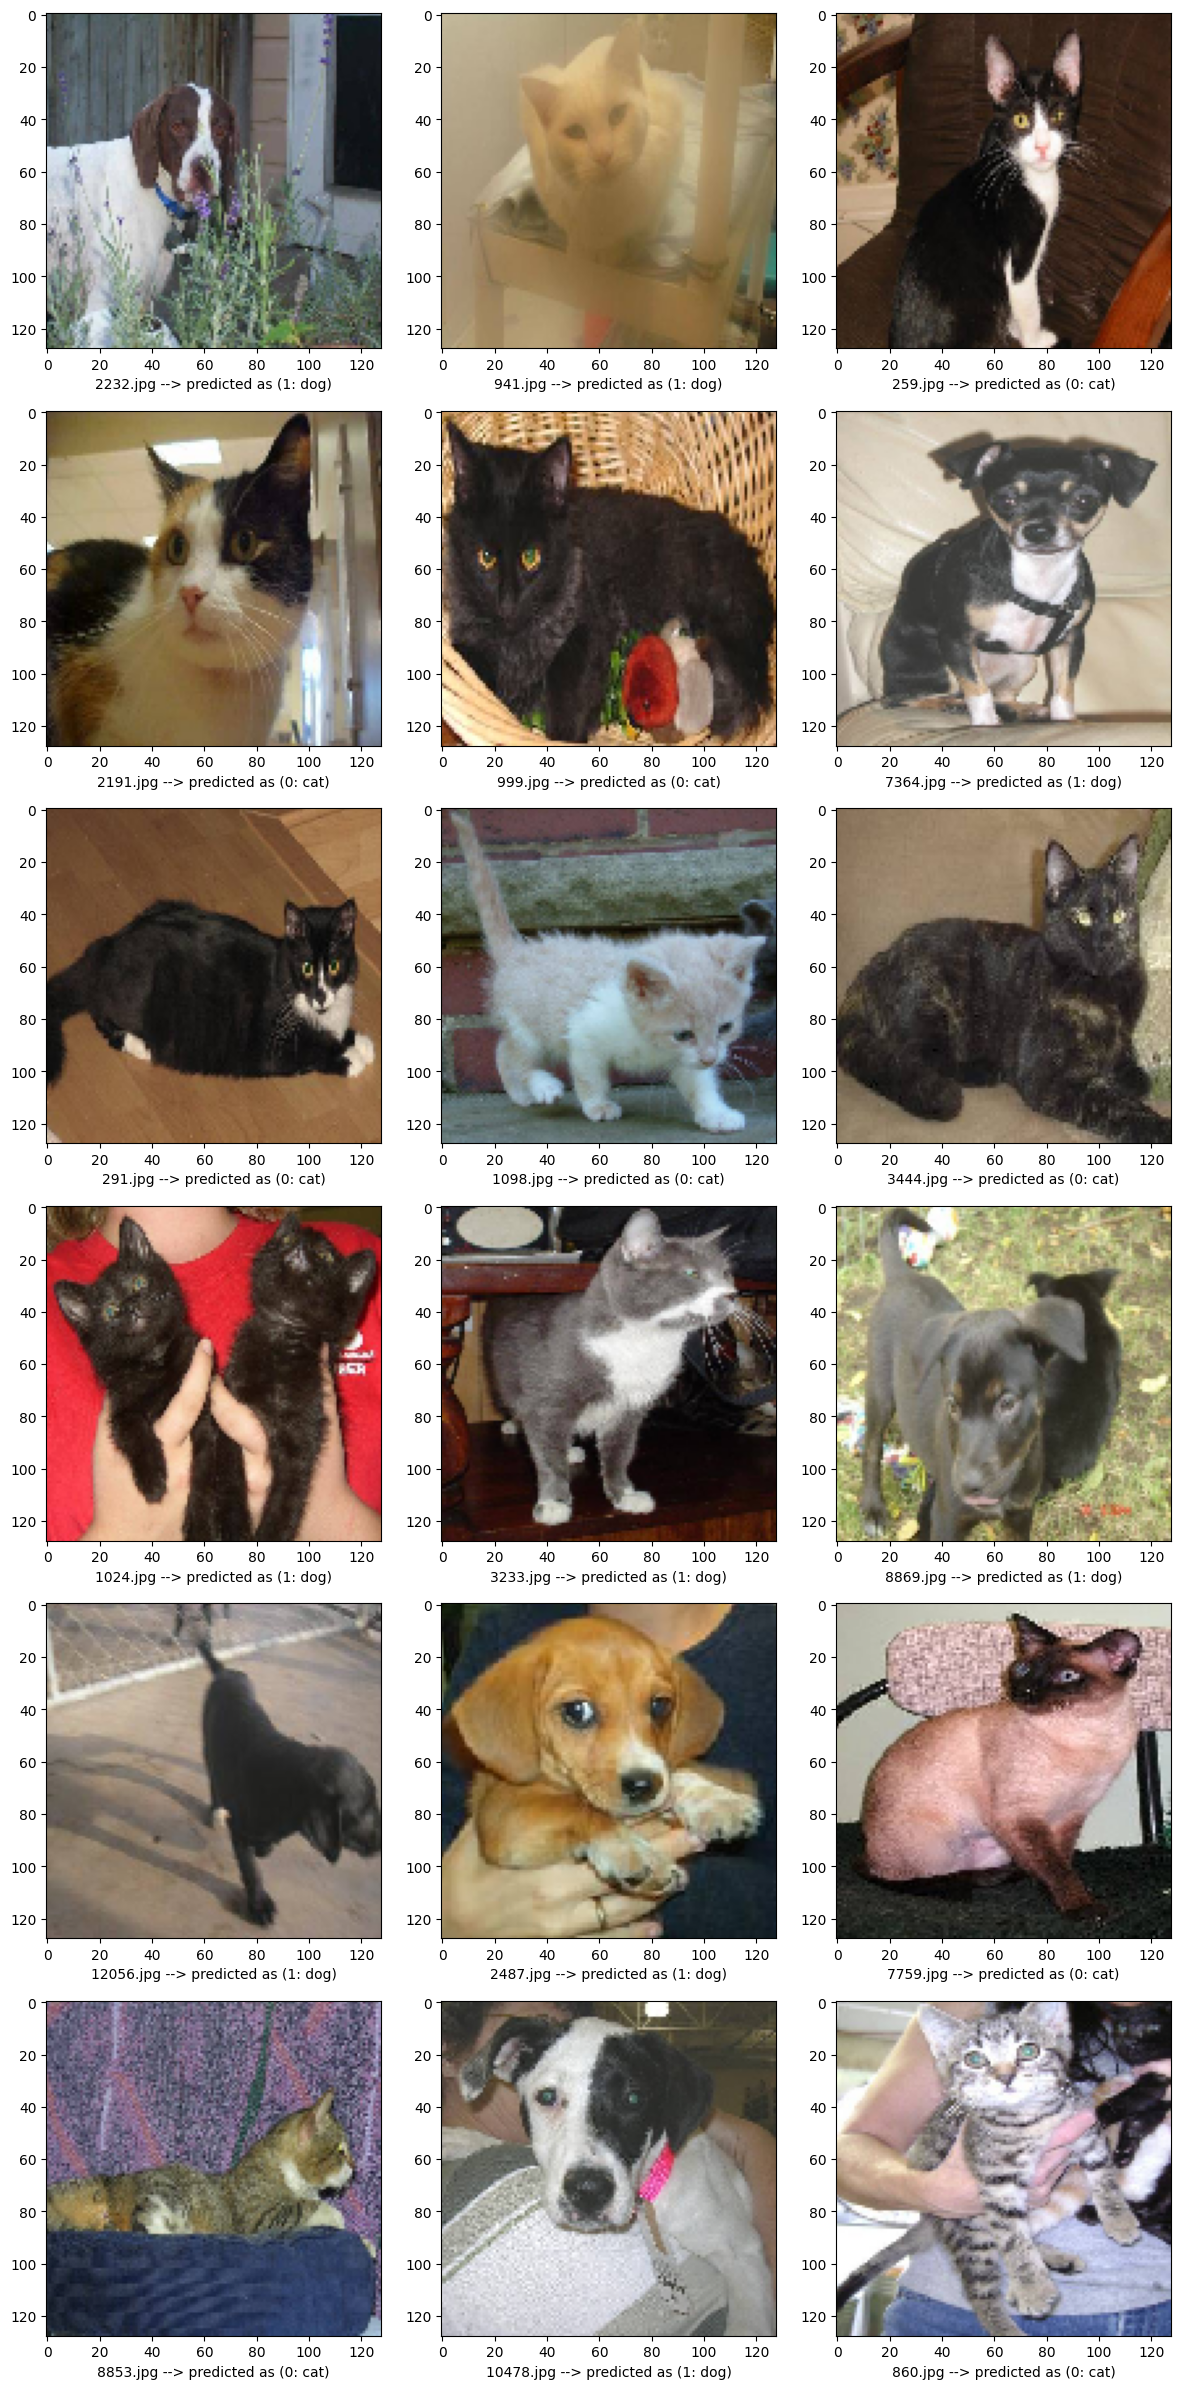

In [58]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../working/test/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename +' --> predicted as ' +'(' + "{}".format(category)+': '+label_map[category]+')')
plt.tight_layout()
plt.show()

# Submission

In [59]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

# Thanks